<a href="https://colab.research.google.com/github/korukondadurgaprasad/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd

In [3]:
data = pd.read_csv('/content/TestReviews.csv')
data

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1
...,...,...
4316,My wife and I caught this show at the Golden N...,0
4317,This was the dumbest show we have ever seen. ...,0
4318,My girlfriend and I went to this show. It was ...,0
4319,The restrooms looked like after an bombardment...,0


In [4]:
data.head() # Top 5 rows of the data set

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1


In [5]:
data.tail() # Last 5 rows of the data set

,review,class
4316,My wife and I caught this show at the Golden N...,0
4317,This was the dumbest show we have ever seen. ...,0
4318,My girlfriend and I went to this show. It was ...,0
4319,The restrooms looked like after an bombardment...,0
4320,Have been going to the Pennsylvania Macaroni C...,0


In [6]:
data.info() # information of the dat set like , data type , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  4321 non-null   object
 1   class   4321 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.6+ KB


In [7]:
data.describe() # stastical information of the data set

,class
count,4321.000000
mean,0.691738
std,0.461829
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
#checking the null values of the data set
data.isnull().sum()


review    0
class     0
dtype: int64

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4316    False
4317    False
4318    False
4319     True
4320    False
Length: 4321, dtype: bool

In [11]:
#checking the value counts
value_counts = data['class'].value_counts()
print(value_counts)

class
1    2989
0    1332
Name: count, dtype: int64


In [12]:
pip install matplotlib

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

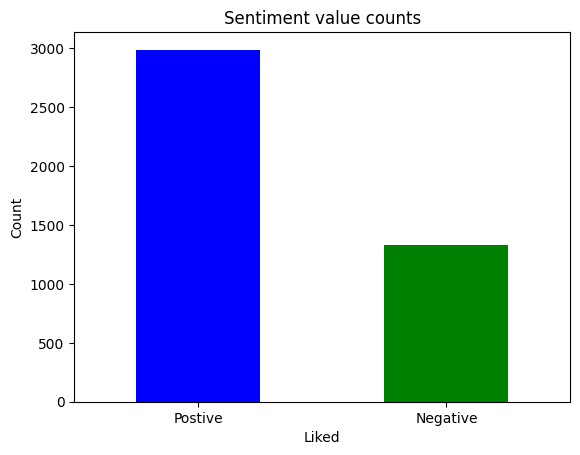

In [14]:
value_counts.plot(kind = 'bar' , color = ['blue', 'green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

In [15]:
!pip install wordcloud

We install the `wordcloud` library in Python to generate word cloud visualizations. A word cloud is a graphical representation of text data where the size of each word indicates its frequency or importance. This tool is particularly useful for visualizing the most prominent words in a text corpus, such as in sentiment analysis or text mining projects. It helps in quickly identifying the most common words or themes in the data.

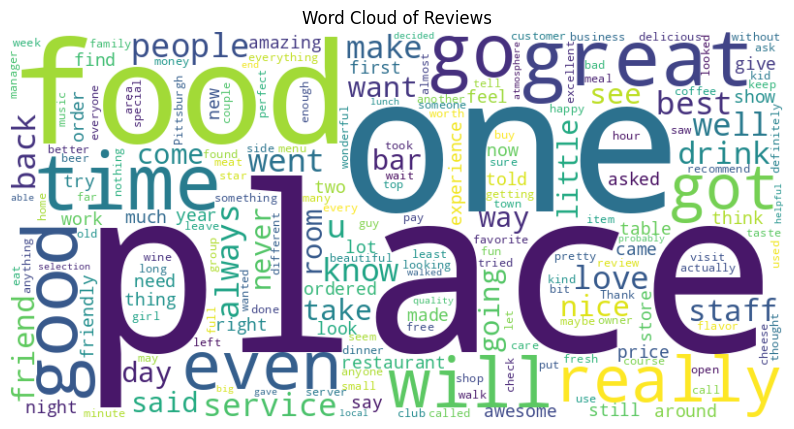

In [18]:
from wordcloud import WordCloud
combined_text = " ".join(data['review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [19]:
from collections import Counter

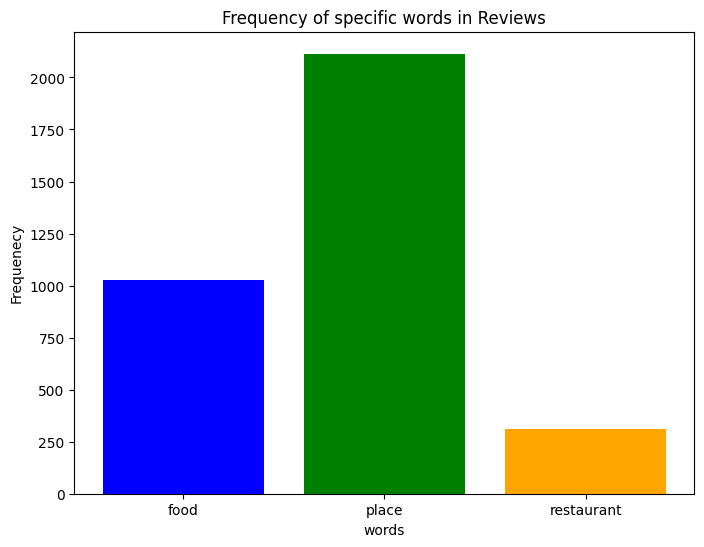

In [21]:
target_words = ['food','place','restaurant']
all_words = " ".join(data['review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values() , color = ['blue','green','orange'])
plt.xlabel('words')
plt.ylabel('Frequenecy')
plt.title('Frequency of specific words in Reviews')
plt.show()

# Text preprocessing

In [24]:
#convert a data set into lower case
lowercased_text = data['review'].str.lower()
print(lowercased_text)

0       fantastic spot for an even or a quite cocktail...
1       love, love, love the calamari. it's so good an...
2       love this place. stiff martinis and cocktails,...
3       it's everything a great cocktail bar should be...
4       i came here before a pirates game, so it was a...
                              ...                        
4316    my wife and i caught this show at the golden n...
4317    this was the dumbest show we have ever seen.  ...
4318    my girlfriend and i went to this show. it was ...
4319    the restrooms looked like after an bombardment...
4320    have been going to the pennsylvania macaroni c...
Name: review, Length: 4321, dtype: object



The word_tokenize function from the nltk.tokenize module in the Natural Language Toolkit (NLTK) library is used to split text into individual words, a process known as tokenization. Tokenization is a fundamental step in natural language processing (NLP) tasks, allowing you to work with individual words rather than whole sentences or paragraphs.



In [26]:
import nltk
nltk.download('punkt')
#tokinization
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
data['Tokens'] = data['review'].apply(word_tokenize)
print(data['Tokens'])

0       [Fantastic, spot, for, an, even, or, a, quite,...
1       [Love, ,, love, ,, love, the, calamari, ., It,...
2       [Love, this, place, ., Stiff, martinis, and, c...
3       [It, 's, everything, a, great, cocktail, bar, ...
4       [I, came, here, before, a, pirates, game, ,, s...
                              ...                        
4316    [My, wife, and, I, caught, this, show, at, the...
4317    [This, was, the, dumbest, show, we, have, ever...
4318    [My, girlfriend, and, I, went, to, this, show,...
4319    [The, restrooms, looked, like, after, an, bomb...
4320    [Have, been, going, to, the, Pennsylvania, Mac...
Name: Tokens, Length: 4321, dtype: object


In [32]:
import string
data['review'] = data['review'].str.replace(f"[{string.punctuation}]"," ",regex = True)
print(data['review'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: review, Length: 4321, dtype: object



The stopwords module from the NLTK library is used to remove common words (like "this," "is," "are," "was," etc.) that do not carry significant meaning and are often removed during text preprocessing in NLP tasks.

In [34]:
#Removing the stop words like this, is , are ,was
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stop_words = set(stopwords.words('english'))

In [37]:
data['Tokens'] = data['review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [38]:
print(data['Tokens'])

0       [Fantastic, spot, even, quite, cocktail, They,...
1       [Love, love, love, calamari, It, good, spicy, ...
2       [Love, place, Stiff, martinis, cocktails, chea...
3       [It, everything, great, cocktail, bar, Great, ...
4       [I, came, pirates, game, around, 5, 30ish, eve...
                              ...                        
4316    [My, wife, I, caught, show, Golden, Nugget, he...
4317    [This, dumbest, show, ever, seen, We, never, l...
4318    [My, girlfriend, I, went, show, It, absolutely...
4319    [The, restrooms, looked, like, bombardment, im...
4320    [Have, going, Pennsylvania, Macaroni, Company,...
Name: Tokens, Length: 4321, dtype: object


#stemming
stemming is the process of reducing the a word into root or base word form by removig suffix
example : driving stemmed is drive

In [39]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [40]:
stemmer = PorterStemmer()

In [42]:
data['stemmed'] = data['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])

0       fantast spot for an even or a quit cocktail th...
1       love love love the calamari it s so good and s...
2       love thi place stiff martini and cocktail chea...
3       it s everyth a great cocktail bar should be gr...
4       i came here befor a pirat game so it wa around...
                              ...                        
4316    my wife and i caught thi show at the golden nu...
4317    thi wa the dumbest show we have ever seen we n...
4318    my girlfriend and i went to thi show it wa abs...
4319    the restroom look like after an bombard an imp...
4320    have been go to the pennsylvania macaroni comp...
Name: stemmed, Length: 4321, dtype: object


#Lemmatization
Lemmatization is the process transforming a word into its base or dictionary form
example is better is lemmtized to good

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [45]:
lemmatizer = WordNetLemmatizer()

In [48]:
data['Lemmatized'] = data['review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])



0       Fantastic spot for an even or a quite cocktail...
1       Love love love the calamari It s so good and s...
2       Love this place Stiff martinis and cocktails c...
3       It s everything a great cocktail bar should be...
4       I come here before a pirate game so it be arou...
                              ...                        
4316    My wife and I catch this show at the Golden Nu...
4317    This be the dumbest show we have ever see We n...
4318    My girlfriend and I go to this show It be abso...
4319    The restrooms look like after an bombardment a...
4320    Have be go to the Pennsylvania Macaroni Compan...
Name: Lemmatized, Length: 4321, dtype: object


In [51]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['review'].apply(lambda x : re.sub(r'\d+',' ' ,x))
print(data['No_Numbers'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: No_Numbers, Length: 4321, dtype: object


In [54]:
#removing special characters like @ # %,*
data['cleaned'] = data['review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))
print(data['cleaned'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: cleaned, Length: 4321, dtype: object


#expanding method
 don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [55]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.6 MB/s eta 0:00:00


In [58]:
import contractions
data['Expanded'] = data['review'].apply(contractions.fix)
print(data['Expanded'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: Expanded, Length: 4321, dtype: object


In [59]:
#Removing emojis
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00


In [62]:
import emoji
data['emoji'] = data['review'].apply(emoji.demojize)
print(data['emoji'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: emoji, Length: 4321, dtype: object


# removing liks from review_ text
food is good vist www.abchotel.in

In [63]:
!pip install beautifulsoup4

In [64]:
from bs4 import BeautifulSoup

In [67]:
data['cleaned'] = data['review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['cleaned'])

0       Fantastic spot for an even or a quite cocktail...
1       Love  love  love the calamari  It s so good an...
2       Love this place  Stiff martinis and cocktails ...
3       It s everything a great cocktail bar should be...
4       I came here before a pirates game  so it was a...
                              ...                        
4316    My wife and I caught this show at the Golden N...
4317    This was the dumbest show we have ever seen   ...
4318    My girlfriend and I went to this show  It was ...
4319    The restrooms looked like after an bombardment...
4320    Have been going to the Pennsylvania Macaroni C...
Name: cleaned, Length: 4321, dtype: object


In [68]:
#TF IDF VECTORIZER converts catigorical data into numerical data so thar machine can understand it better

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [70]:
X = vectorizer.fit_transform(data['review'])
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08434984 0.         0.         ... 0.         0.         0.        ]]


In [71]:
#bulding a machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


In [76]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test,y_pred)

In [79]:
report = classification_report(y_test,y_pred)

In [80]:
print(f'Accuracy {accuracy}')

Accuracy 0.7710982658959538


In [81]:
print(f'Classfication Report:')
print(report)

Classfication Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25       231
           1       0.76      1.00      0.86       634

    accuracy                           0.77       865
   macro avg       0.88      0.57      0.56       865
weighted avg       0.83      0.77      0.70       865



In [82]:
#prediction of new review
def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review,"html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]"," ",review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words =set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos = 'v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review

In [83]:
#new review prediction
new_review = input("Enter a review")
cleaned_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is predicted postive")
else:
    print("The review is predicted negative")

Enter a reviewgood
The review is predicted postive
